##### Task : From the given ‘Iris’ dataset, predict the optimum number of  clusters and represent it visually. 


##### Done By: Prithwiswar Bhattacharya

### 1.Importing the required packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore the warning messages.
import warnings
warnings.simplefilter("ignore")

### 2.Reading the dataset and extracting raw facts.

In [2]:
iris=pd.read_csv("Iris.csv") #creating dataframe of the csv file

In [3]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [6]:
iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


### 3. Dropping the target column for unsupervised learning.

In [7]:
df = iris.drop(['Species','Id'], axis=1) #Id column is useless.

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 4.Exploratory Data Analysis.

######  Scatter Matrix

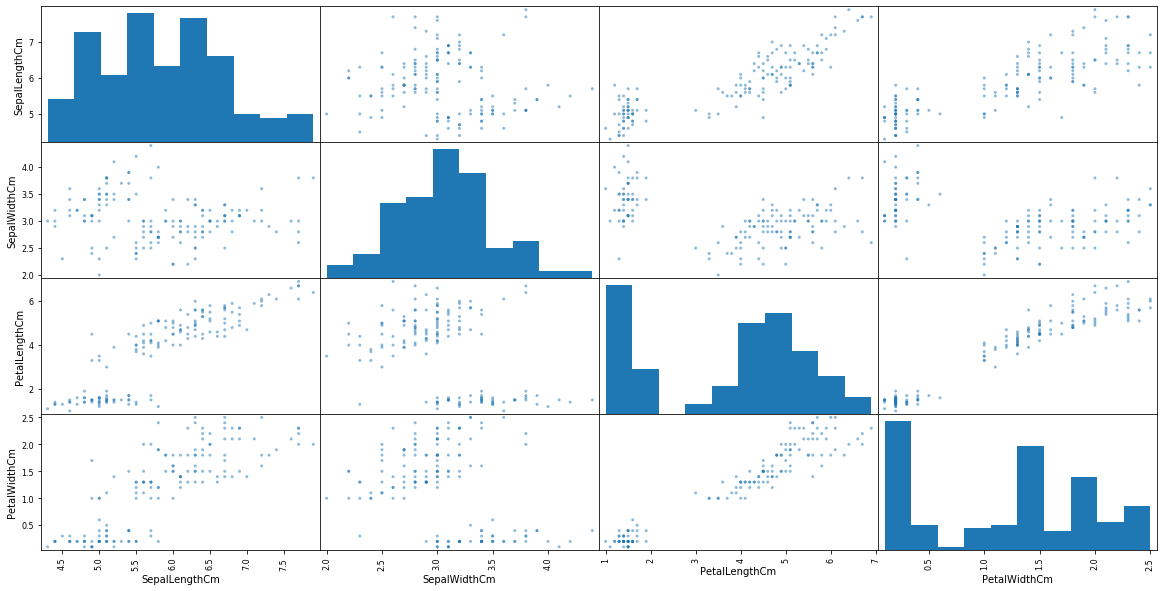

In [9]:
pd.plotting.scatter_matrix(df,figsize=(20,10))
y=0 #to avoid the array message, this line has no other significance.

### 5.Elbow Method to find optimal number of clusters.

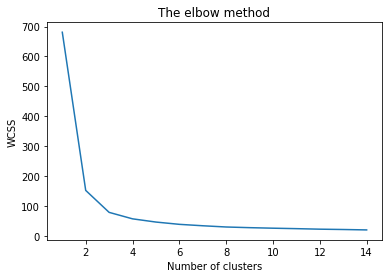

In [10]:
x = df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
arr = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    arr.append(kmeans.inertia_)
plt.plot(range(1, 15), arr)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

Hence, We can conclude that the optimal cluster(n_clusters)=3

### 6.K-Mean Algorithm.

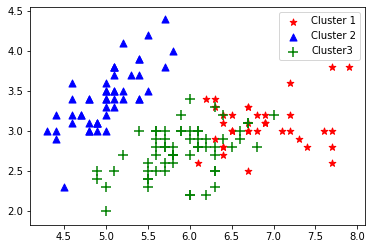

In [14]:
km = KMeans(n_clusters=3)
km.fit(df)
pred=km.predict(df)

a=plt.scatter(x[pred == 0, 0], x[pred == 0, 1], 
            s = 50, c = 'red',marker='*')
b=plt.scatter(x[pred == 1, 0], x[pred == 1, 1], 
            s = 50, c = 'blue',marker='^')
c=plt.scatter(x[pred == 2, 0], x[pred == 2, 1],
            s = 100, c = 'green',marker='+')

plt.legend([a, b, c], ['Cluster 1', 'Cluster 2', 'Cluster3'])

The visualisation of the predicted cluster obtained by K-means algorithm.

### 7.Gaussian Mixture.

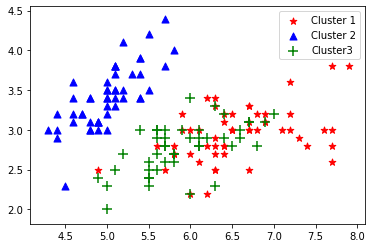

In [15]:
from sklearn.mixture import GaussianMixture
gclf = GaussianMixture(n_components=3).fit(df)
gpred = gclf.predict(df)

ga=plt.scatter(x[gpred == 0, 0], x[gpred == 0, 1], 
            s = 50, c = 'red',marker='*')
gb=plt.scatter(x[gpred == 1, 0], x[gpred == 1, 1], 
            s = 50, c = 'blue',marker='^')
gc=plt.scatter(x[gpred == 2, 0], x[gpred == 2, 1],
            s = 100, c = 'green',marker='+')

plt.legend([ga, gb, gc], ['Cluster 1', 'Cluster 2', 'Cluster3'])

The visualisation of predicted clusters obtained by Gussian Mixture Algorithm.

### 8.Conclusion.

#### We can conclude from the visualisation that Both K-Means and Gaussian Mixture Algorithm are performing best at this dataset.